In [1]:
import sys
import matplotlib
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, axis
from matplotlib.patches import Ellipse
import scipy
import numpy as np
from numpy import *
import math
import pylab
import random
from pylab import *
from astropy.coordinates import SkyCoord
from astropy import units as u
import pylab as P
from astropy.io import ascii
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

matplotlib.style.use('ggplot')

sns.set_style('darkgrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [31]:
dat4=ascii.read("Leo4_lisp_rod_sdss_ppmxl",data_start=2)
dat5=ascii.read("Leo5_lisp_rod_sdss_ppmxl",data_start=2)
datB=ascii.read("LeoB_lisp_rod_sdss_ppmxl",data_start=2)

print(dat4)

index    Name1         fname       FWHM  ... imagconea  No  fl    Separation2   
----- ----------- --------------- ------ ... --------- --- --- -----------------
    5  F1_P100135 AAOmega_Leo4_Fi 111.32 ...     18.69   4   0 5.40693834998e-05
    6  F1_P100968 AAOmega_Leo4_Fi 123.82 ...     17.05   6   0 2.19319781564e-05
   13  F1_P100601 AAOmega_Leo4_Fi 175.05 ...     17.11   6   0 4.28385535439e-05
   22  F1_P100598 AAOmega_Leo4_Fi 154.36 ...     17.95   5   0 6.48401685356e-05
   23  F1_P100314 AAOmega_Leo4_Fi  138.8 ...     18.18   5   0 6.01019263776e-05
   24  F1_P100271 AAOmega_Leo4_Fi 156.36 ...     17.29   6   0 5.13492927633e-05
   25   F1_P10094 AAOmega_Leo4_Fi 193.03 ...     17.89   6   0 0.000114324129818
   26  F1_P100955 AAOmega_Leo4_Fi 177.65 ...     18.53   5   0 3.67829820299e-05
   27  F1_P100954 AAOmega_Leo4_Fi 173.94 ...     17.43   6   0 2.55877120568e-05
   28   F1_P10093 AAOmega_Leo4_Fi 166.73 ...      18.0   6   0 6.49353261849e-05
  ...         ...           

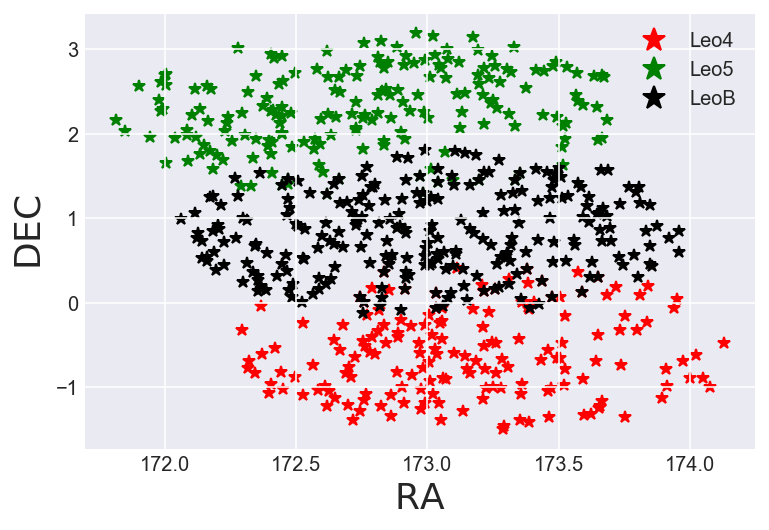

In [30]:
### where are we pointed in the sky
fig0=plt.figure(1)
ax=fig0.add_subplot(111)
ax.plot(Radeg4,Decdeg4,'*r',label='Leo4',zorder=-1)
ax.plot(Radeg5,Decdeg5,'*g',label='Leo5',zorder=-1)
ax.plot(RadegB,DecdegB,'*k',label='LeoB',zorder=-1)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{DEC}$',fontsize=18)
ax.legend(markerscale=(2), loc=1, numpoints=1)
plt.show()

In [33]:
vhc4 = dat4['Vhel']
verr4 = dat4['Verr']
Radeg4=dat4['RA']
Decdeg4=dat4['DEC']

vhc5 = dat5['Vhel']
verr5 = dat5['Verr']
Radeg5=dat5['RA']
Decdeg5=dat5['DEC']

vhcB = datB['Vhel']
verrB = datB['Verr']
RadegB=datB['RA']
DecdegB=datB['DEC']

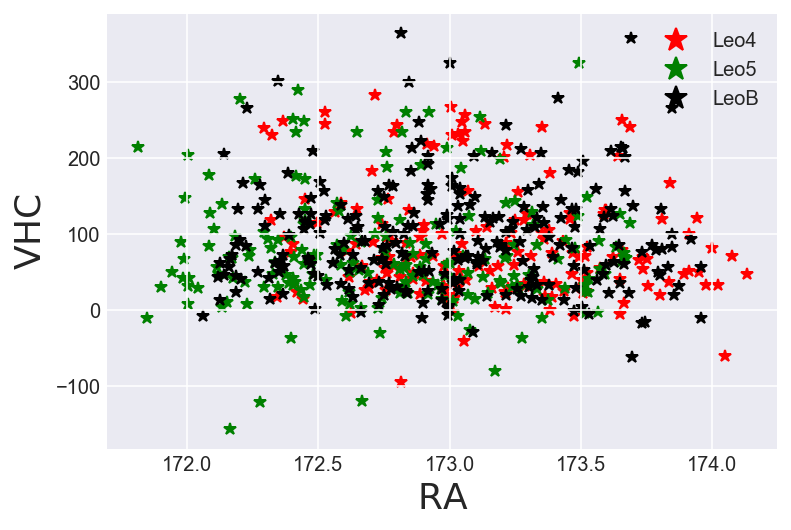

In [41]:
fig0=plt.figure(1)
ax=fig0.add_subplot(111)
ax.plot(Radeg4,vhc4,'*r',label='Leo4',zorder=-1)
ax.plot(Radeg5,vhc5,'*g',label='Leo5',zorder=-1)
ax.plot(RadegB,vhcB,'*k',label='LeoB',zorder=-1)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{VHC}$',fontsize=18)
ax.legend(markerscale=(2), loc=1, numpoints=1)
plt.show()

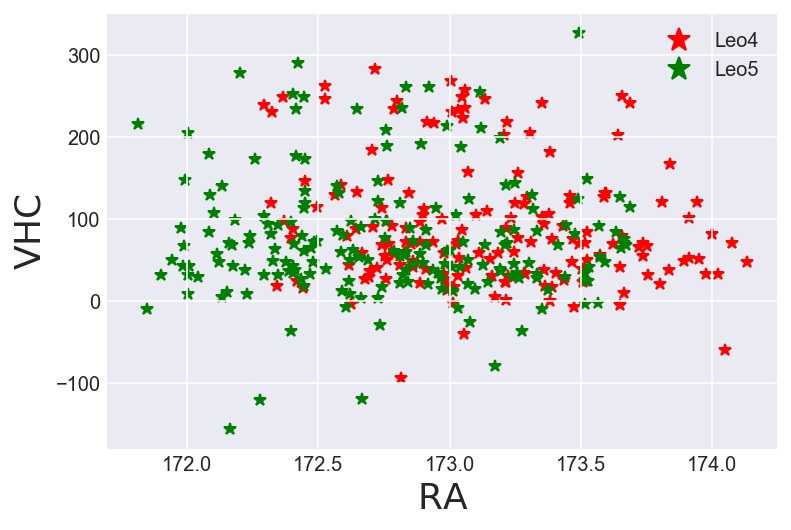

In [39]:
### The data (LeoB not included) look like could be divided to 2 different groups.
fig0=plt.figure(1)
ax=fig0.add_subplot(111)
ax.plot(Radeg4,vhc4,'*r',label='Leo4',zorder=-1)
ax.plot(Radeg5,vhc5,'*g',label='Leo5',zorder=-1)
#ax.plot(RadegB,vhcB,'*k',label='LeoB',zorder=-1)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{VHC}$',fontsize=18)
ax.legend(markerscale=(2), loc=1, numpoints=1)
plt.show()

In [43]:
df4=pd.DataFrame({}, dtype=float)
df4['Ra']=Radeg4
df4['Dec']=Decdeg4
df4['V']=vhc4
df4['type']='4'

df5=pd.DataFrame({}, dtype=float)
df5['Ra']=Radeg5
df5['Dec']=Decdeg5
df5['V']=vhc5
df5['type']='5'

dfb=pd.DataFrame({}, dtype=float)
dfb['Ra']=RadegB
dfb['Dec']=DecdegB
dfb['V']=vhcB
dfb['type']='0'

df4.describe().T
df5.describe().T
dfb.describe().T

,count,mean,std,min,25%,50%,75%,max
Ra,254.0,172.992299,0.480875,172.060596,172.620685,172.993210,173.354469,173.957379
Dec,254.0,0.813037,0.477672,-0.117703,0.451313,0.780825,1.222173,1.809768
V,254.0,94.555554,69.944432,-62.015300,44.958225,82.378900,132.538900,364.103700


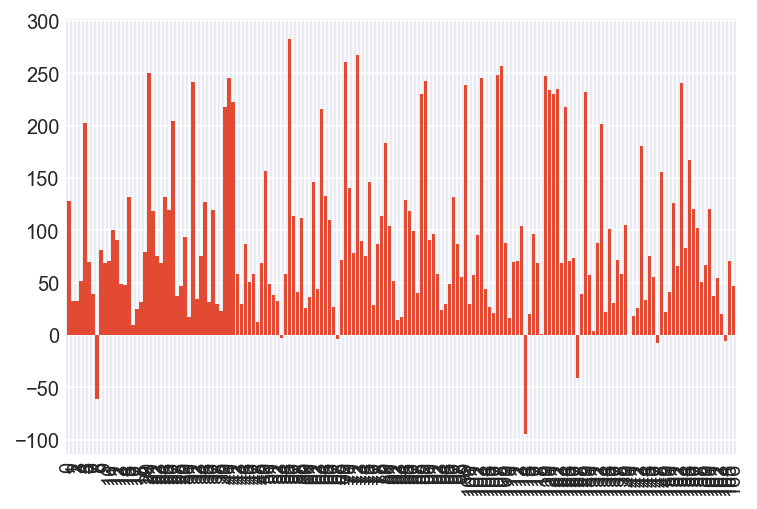

In [45]:
df4['V'].plot(kind='bar', width=0.8)

In [56]:
##start to use pandas
dfall=pd.concat([df4, df5, dfb], ignore_index=True)
dfall.describe().T
group=dfall.groupby(['type'])
group.mean()

,Ra,Dec,V
type,,,
0,172.992299,0.813037,94.555554
4,173.145054,-0.594130,89.990328
5,172.767223,2.291583,74.992600


In [49]:
#check the data
dfall.isnull().sum()

Ra      0
Dec     0
V       0
type    0
dtype: int64

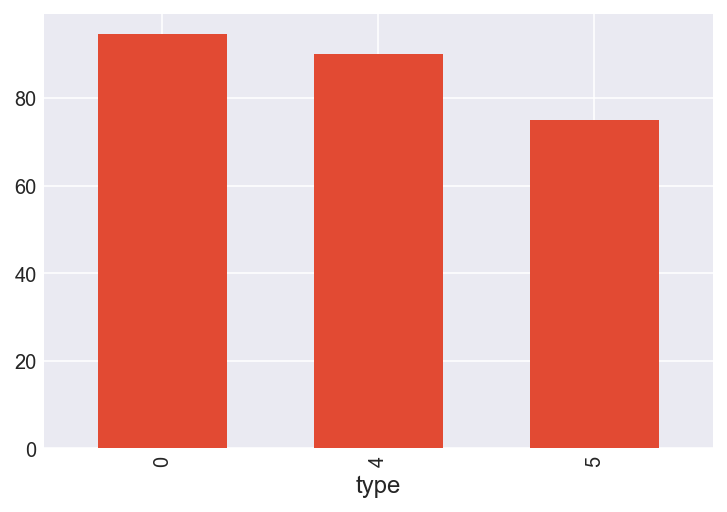

In [57]:
dfall.groupby(['type'])['V'].mean().plot(kind='bar', width=0.6)

### NOW, start the ML

In [ ]:
dfall['Target']= np.where(dfall['V']>=200, '1', '0') #1 is yes, 0 is no

In [84]:
dfall.head()

,Ra,Dec,V,type,Target
0,173.458383,-0.554486,127.6215,4,0
1,174.022241,-0.614795,32.8969,4,0
2,173.974729,-0.693737,32.7209,4,0
3,173.910096,-0.786253,51.8847,4,0
4,173.641408,-0.687670,202.4992,4,1


In [86]:
dfall['Ra']=dfall['Ra'].astype(float)
dfall['Dec']=dfall['Dec'].astype(float)

In [93]:
Xk = dfall[[c for c in dfall.columns if not c in ['Target','type']]]
#X = dfall.V.values.astype(float)
Yk = dfall.type.values.astype(float)

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)

In [94]:
scores = cross_val_score(knn, Xk, Yk, cv=10)
print(scores)
print(np.mean(scores))

[ 0.38709677  0.43548387  0.46774194  0.4516129   0.49180328  0.3442623
  0.39344262  0.33333333  0.45        0.38333333]
0.413811034726


In [95]:
k_values = range(1,60,2)
accs = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xs, yk, cv=10)
    accs.append(np.mean(scores))

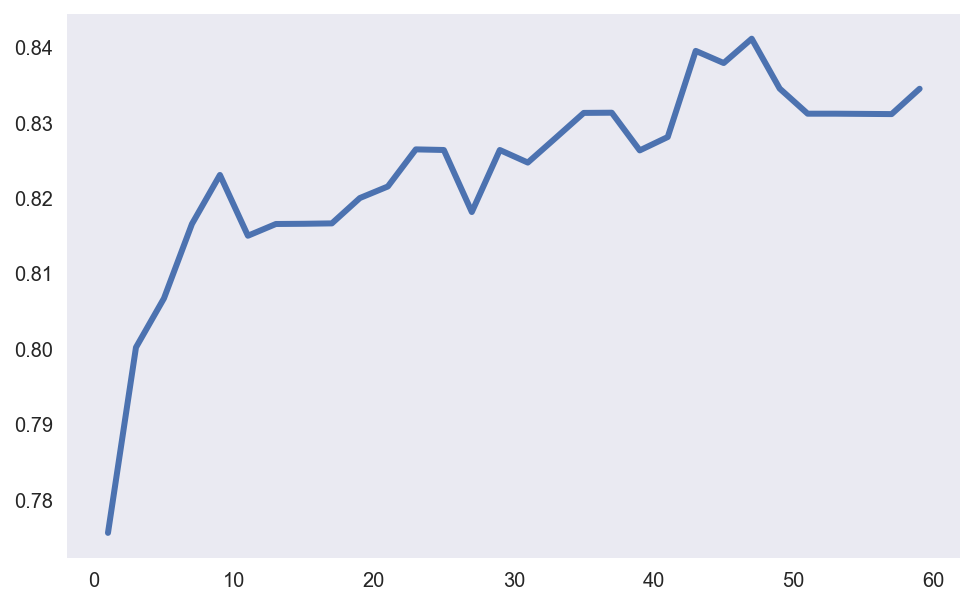

0.841137845937


In [98]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(k_values, accs, lw=3)
plt.show()

print(np.max(accs))